# Sparse Signal and Compressible Signal

## Sparse signal

Sparse vector is vectors which entries are almost zero.

$
x \in \Sigma_k \\
\Sigma_k = \{ z ~~ : ~~ ||z||_0 = k \}, ~~~~~ z \in \mathbb{R}^N 
$

In [92]:
import numpy as np

def sparse(n, k):
    u"""
        [return]  k-sparse vector
        n:        size of vector
        k:        number of nonzero entries
    """
    z   = np.zeros(n)
    for i in np.random.choice( np.arange(n), k, replace=None ):   # supports of nonzero entries
        z[i] = np.random.randn()
    return z


### Sparse vector example

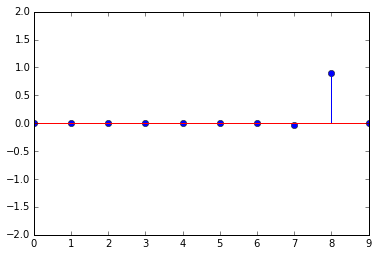

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt

N, k = 10, 2
n = np.arange(N)
x = sparse(N,k)

plt.ylim(-2,2)
plt.stem(n, x)
plt.show()

## Compressible signal

Sparse is just the ideal concept. In real situation, it is difficult to find true sparse vector. Because of this, we have to consider more practical concept, it is called **compressible**.





In [88]:
import numpy as np

def compressible(n, k, e):
    u"""
        [return]  k-sparse vector
        n:        size of vector
        k:        number of nonzero entries
        e:        noise level
    """
    z    = np.zeros(n)
    N    = np.arange(n)
    K    = np.random.choice( N, k, replace=None )
    K_c  = [ i for i in N if i not in K]

    for k in K:   # supports of nonzero entries
        z[k] = np.random.randn() + 0.2
    for i in K_c:
        z[i] = e * np.random.randn()
        
    return z


### Compressible vector example

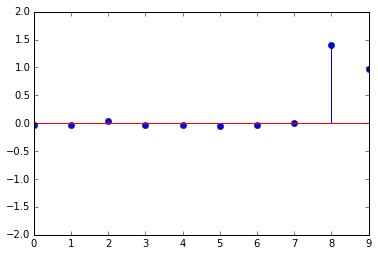

In [90]:
N, k = 10, 2
n = np.arange(N)
x = compressible(N,k, 0.05)

plt.ylim(-2,2)
plt.stem(n, x)
plt.show()

### Compressibility

Compressibilty is defined as below, depends on  $k$ (sparsity) and $p$ (dimension of norm).

$ \sigma_k (x)_p = \min\limits_{\hat{x} \in \Sigma_k} || x - \hat{x} ||_p $

This means, when we make k-sparse vector, of which k largest entries of $\hat{x}$ equals to entries of $x$, so these differences of k largest entries are to be zero, and then left p-norm residuals in $x$ are summed up to $\sigma_k (x)_p$.
Frankly speaking, therefore, compressibility is the $l_p$-norm residual after taking large entries by k-sparse entries.

In [86]:
def compressibility(k, x, p):
    
    K     = np.argsort(x)[:k]
    n     = x.shape[0]
    for k in K:
        x[k] = 0.0
    return np.linalg.norm(x,2)


N, k  = 10, 2
n     = np.arange(N)
x     = compressible(N,k, 0.05)
print "[compressibility]:  %f" % compressibility(k, x, p=2)


[compressibility]:  0.126265


### Compressibility (by decay rate)

$c_i$ are coefficients which are sorted in descendant,  $ |c_1| \geq |c_2| \geq ... |c_n| $. 

$
|c_i| \leq {C_1}^{i-q}
$

$C_1$ and $q$ are positive constants, ($0 < C_1 < 1$, $q>0$) .
The smaller $C_1$ is and the larger $q$ is, the higher compressibility becomes.


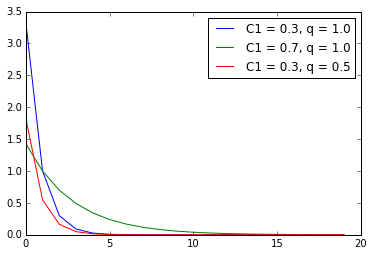

In [89]:
C1, q1  = 0.3, 1.0
C2, q2  = 0.7, 1.0
C3, q3  = 0.3, 0.5

i   = np.arange(20)
c1  = np.power( C1, i-q1 )
c2  = np.power( C2, i-q2 )
c3  = np.power( C3, i-q3 )

plt.plot(i, c1, label='C1 = %.1f, q = %.1f' % (C1, q1) )
plt.plot(i, c2, label='C1 = %.1f, q = %.1f' % (C2, q2) )
plt.plot(i, c3, label='C1 = %.1f, q = %.1f' % (C3, q3) )
plt.legend()
plt.show()
